# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

---

**Caution:** This notebook was generated by an AI and has not been fully verified. Please use caution when interpreting the code and results. Review all analyses and outputs carefully before relying on them for any purpose.

---

This notebook explores data from the Dandiset [001366, version 0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603):

> **Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification**

**Description:**  
*Movies of a pial vessel of mice used in the experiments.*

**Citation:**  
Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken ; Kelley, Douglas H. ; Boster, Kimberly A. S. (2025) _Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification (Version 0.250324.1603)_ [Data set]. DANDI Archive. [https://doi.org/10.48324/dandi.001366/0.250324.1603](https://doi.org/10.48324/dandi.001366/0.250324.1603)

**Keywords:** full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform

## Notebook Objectives
In this notebook, we will:

- Retrieve basic metadata about the Dandiset and list available assets (NWB files).
- Load and explore the structure and contents of a selected NWB file.
- Summarize the NWB file using tables and diagrams.
- Access and visualize vessel imaging data contained in the NWB file.
- Demonstrate reproducible techniques for further exploration.

This notebook emphasizes *clarity* and *basic exploration*. More advanced analysis may require further review of the dataset and domain background.

## Required Python Packages

This notebook assumes the following packages are installed in your environment:

- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `numpy`

> **Note:** No installation commands are included. Please install packages externally if needed.

In [1]:
# Load basic Dandiset info using dandi API and list assets

from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}\n")

# List some assets in the Dandiset (show all NWB files available)
print("Available assets (NWB files):")
nwb_assets = []
for asset in dandiset.get_assets():
    if asset.path.endswith(".nwb"):
        nwb_assets.append((asset.identifier, asset.path, asset.size))
        print(f"- {asset.path} (ID: {asset.identifier}, {asset.size/1e6:.1f} MB)")
print(f"\nTotal NWB files: {len(nwb_assets)}")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Description: movies of a pial vessel of mice used in the experiments.

Available assets (NWB files):
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d, 408.1 MB)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59, 2377.8 MB)

Total NWB files: 2


## Selected NWB File for Exploration

For illustration, we select the smaller NWB file available in this Dandiset:

- **File path:** `sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`
- **Asset ID:** `71fa07fc-4309-4013-8edd-13213a86a67d`

The file can be accessed using the URL:
```
https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/
```

[View this NWB file on NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft)

## Loading the NWB file

We will load the selected NWB file directly from the DANDI archive using `remfile`, `h5py`, and `pynwb`, following the recommended code. This enables remote data access without downloading the entire file.

> **Note:** The file is accessed by hard-coded URL and may be slow to access on the first load due to its size (approx. 389 MB).

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Print key metadata (do not display the entire nwb object)
print("NWB session description:", nwb.session_description)
print("NWB identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Experimenter:", nwb.experimenter)
print("Keywords:", nwb.keywords[:])
print("Experiment description:", nwb.experiment_description)
print("Institution:", nwb.institution)
print("Session ID:", nwb.session_id)
if nwb.subject:
    print("Subject ID:", nwb.subject.subject_id)
    print("Subject species:", nwb.subject.species)
    print("Subject sex:", nwb.subject.sex)
    print("Subject age:", getattr(nwb.subject, 'age', 'N/A'))

NWB session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
NWB identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session start time: 2023-10-19 02:00:00-04:00
Experimenter: ('Ghanizada, Hashmat ',)
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']
Experiment description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen
Session ID: F15BC-19102023
Subject ID: F15
Subject species: Mus musculus
Subject sex: F
Subject age: P9W/P16W


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Structure Overview

**Session Information**

| Field                  | Value                                      |
|------------------------|--------------------------------------------|
| Description            | a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a chronic cranial imaging window for in vivo ~2-photon imaging |
| Identifier             | 202309_Hashmat-OCT.2023-F15BC-19102023     |
| Session start time     | 2023-10-19T02:00:00-04:00                  |
| Institution            | University of Copenhagen                   |
| Subject Species        | Mus musculus                               |
| Subject Sex            | F                                          |
| Strain                 | C57BL/6J                                   |
| Subject ID             | F15                                        |

**Data organization (relevant to this file):**

```
NWBFile
├── acquisition
│   └── Movies (ImageSeries)
│       └── data (9553 frames x 214 rows x 132 cols)
└── subject
```

This NWB file primarily contains an imaging time series (labeled "Movies") representing a grayscale movie of a pial vessel.

## Accessing the Imaging Data ("Movies")

The movie is stored as an NWB `ImageSeries`. Let's inspect its properties and shape.

In [3]:
# Access the Movies imaging series
movies = nwb.acquisition["Movies"]
print("Movies - description:", movies.description)
print("Movies - rate (Hz):", movies.rate)
print("Movies - shape:", movies.data.shape)
print("Movies - data type:", movies.data.dtype)

Movies - description: 16-bit grayscale movie of a pial vessel
Movies - rate (Hz): 54.47
Movies - shape: (9553, 214, 132)
Movies - data type: uint16


### Visualize Example Frames from the Movie

We'll load and display several frames from the movie. Each frame is a 2D uint16 grayscale image.  
Note that all frames are streamed from the remote file, so let's only load a few for illustration.

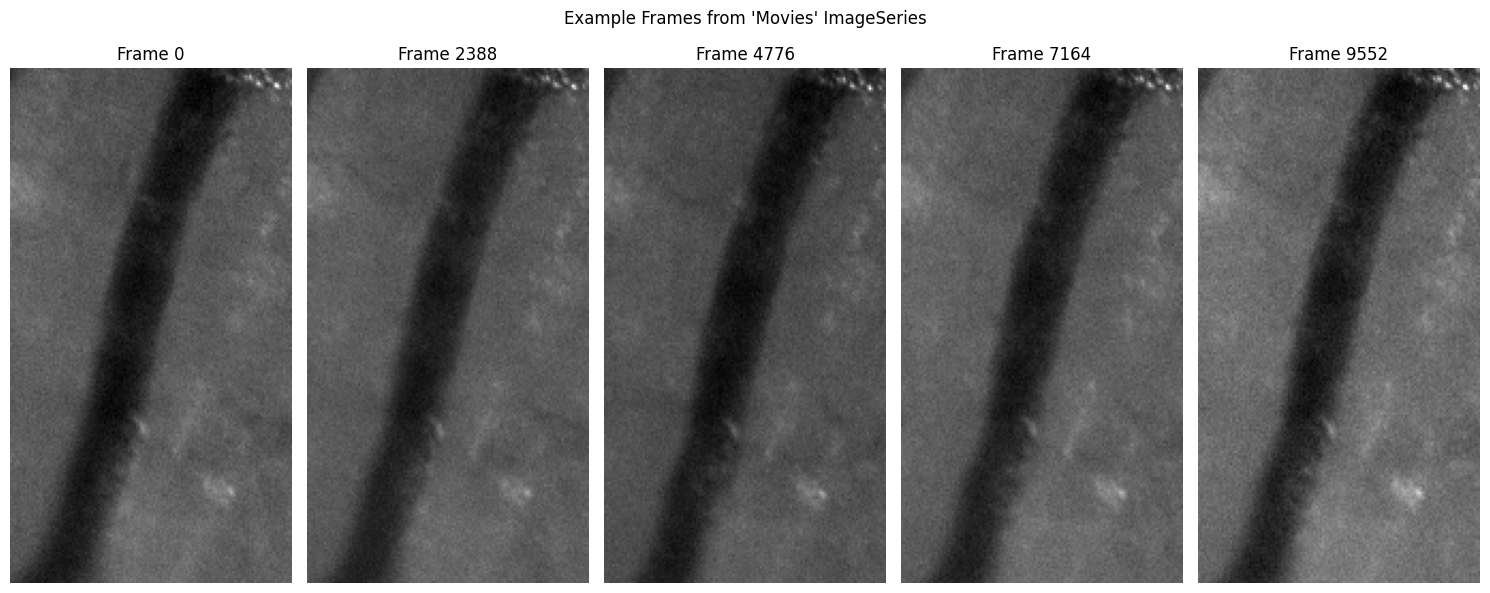

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Load 5 example frames, spaced throughout the movie
n_frames = movies.data.shape[0]
frame_indices = np.linspace(0, n_frames - 1, num=5, dtype=int)
frames = np.stack([movies.data[i, :, :] for i in frame_indices])

plt.figure(figsize=(15, 6))
for idx, (i, frame) in enumerate(zip(frame_indices, frames)):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(frame, cmap='gray', aspect='auto')
    plt.title(f"Frame {i}")
    plt.axis('off')
plt.suptitle("Example Frames from 'Movies' ImageSeries")
plt.tight_layout()
plt.show()

### Frame Intensity Over Time (Example)

Let's visualize the mean frame intensity over the duration of the movie. This can reveal motion, pulsatility, or changes in brightness.

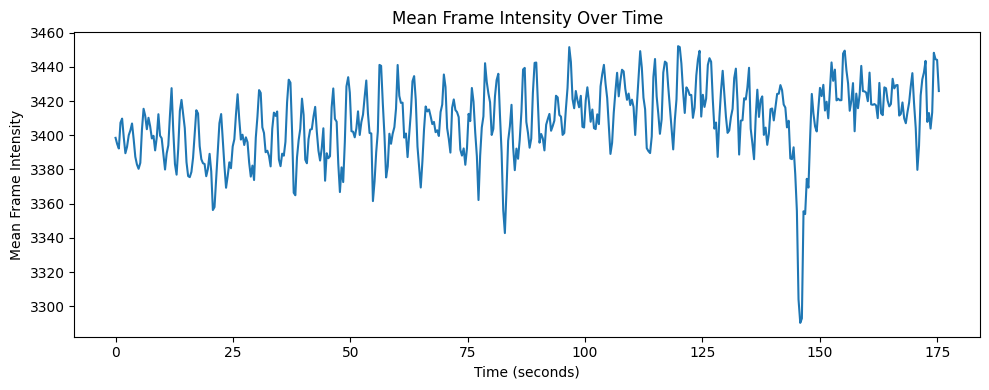

In [5]:
# Compute the mean intensity for each frame (downsample for speed if many frames)
max_frames_to_plot = 500
if n_frames > max_frames_to_plot:
    inds = np.linspace(0, n_frames - 1, max_frames_to_plot, dtype=int)
    mean_intensity = np.array([movies.data[i, :, :].mean() for i in inds])
    times = np.array([movies.starting_time + i / movies.rate for i in inds])
else:
    mean_intensity = np.array([movies.data[i, :, :].mean() for i in range(n_frames)])
    times = np.array([movies.starting_time + i / movies.rate for i in range(n_frames)])

plt.figure(figsize=(10, 4))
plt.plot(times, mean_intensity)
plt.xlabel("Time (seconds)")
plt.ylabel("Mean Frame Intensity")
plt.title("Mean Frame Intensity Over Time")
plt.tight_layout()
plt.show()

### Inspecting Keywords and Other Metadata

In [6]:
print("Keywords:", nwb.keywords[:])
print("Other available attributes in the NWB file:")
for key in dir(nwb):
    if not key.startswith('_') and not callable(getattr(nwb, key)):
        print("-", key)

Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']
Other available attributes in the NWB file:
- acquisition
- all_objects
- analysis
- children
- container_source
- css_style
- data_collection
- data_type
- devices
- ec_electrode_groups
- ec_electrodes
- electrode_groups
- electrodes
- epoch_tags
- epochs
- experiment_description
- experimenter
- fields
- file_create_date
- ic_electrodes
- icephys_electrodes
- icephys_experimental_conditions
- icephys_filtering
- icephys_repetitions
- icephys_sequential_recordings
- icephys_simultaneous_recordings
- identifier
- imaging_planes
- institution
- intervals
- intracellular_recordings
- invalid_times
- js_script
- keywords
- lab
- lab_meta_data
- modified
- modules
- name
- namespace
- neurodata_type
- notes
- object_id
- objects
- ogen_sites
- parent
- pharmacology
- processing
- protocol
- read_io
- related_publications
- scratch
- session_description
- session_id
- session_start_t

## Summary and Future Directions

In this notebook, we:

- Explored the general content and metadata of Dandiset 001366.
- Accessed and examined the structure of one representative NWB file, including its imaging movie data.
- Loaded and visualized sample movie frames and a time course of mean intensity.

**Possible next steps for further analysis:**

- Investigate vessel diameter or pulsatility metrics by segmenting the vessel region in the image series.
- Use time series analysis on extracted vessel measurements.
- Cross-reference other files or experimental conditions in the Dandiset.
- Apply more advanced image analysis techniques (e.g., Radon transform, full width at half maximum) as described in the Dandiset keywords.

*For precise methodology and analytical rigor, refer to original publications and consult with domain experts before formal use.*